In [80]:
#loading processed data from https://colab.research.google.com/drive/17dLa4gGeGand9ReF2vuty01dFU-A6Zmd?usp=sharing
import pickle

f1 = open('/content/drive/MyDrive/B455/Project 4/Data/preprocessed_data.p', 'rb')
f2 = open('/content/drive/MyDrive/B455/Project 4/Data/preprocessed_data_no_zeros.p', 'rb')
f3 = open('/content/drive/MyDrive/B455/Project 4/Data/vocab_list.p', 'rb')
X_z, y_z = pickle.load(f1)
X, y = pickle.load(f2)
vocab_list = pickle.load(f3)
f1.close()
f2.close()
f3.close()

In [81]:
print(X.shape)
print(X_z.shape)

(50000, 500)
(50000, 501)


X_z (X with zeros) has an extra feature compared to X which is the xero weighted words bucket.

Text(0.5, 1.0, 'word weight distribution')

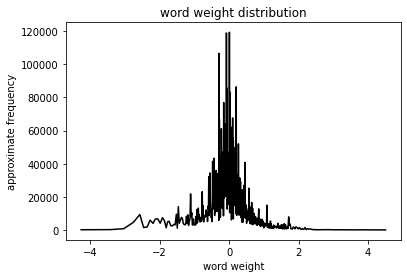

In [82]:
import numpy as np
import matplotlib.pyplot as plt

vocab_weights = [item[1] for item in vocab_list[:-1]]
plt.plot(vocab_weights, np.sum(X, axis=0), color='k')
plt.xlabel('word weight')
plt.ylabel('approximate frequency')
plt.title('word weight distribution')

In [83]:
#standardize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_z)
X_z = sc.transform(X_z)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(X_z, y_z, test_size=0.2, random_state=55)

print(f'Training X shape: {X_train_z.shape}\nTraining y shape: {y_train_z.shape}')
print(f'Testing X shape: {X_test_z.shape}\nTesting y shape: {y_test_z.shape}')

logit_zeros = LogisticRegressionCV(cv=5, solver='sag', random_state=55, verbose=1)
logit_zeros = logit_zeros.fit(X_train_z, y_train_z)

Training X shape: (40000, 501)
Training y shape: (40000,)
Testing X shape: (10000, 501)
Testing y shape: (10000,)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 13 epochs took 2 seconds
convergence after 15 epochs took 2 seconds
convergence after 17 epochs took 3 seconds
convergence after 14 epochs took 2 seconds
convergence after 10 epochs took 1 seconds
convergence after 6 epochs took 1 seconds
convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 0 seconds
convergence after 13 epochs took 2 seconds
convergence after 15 epochs took 2 seconds
convergence after 18 epochs took 3 seconds
convergence after 14 epochs took 1 seconds
convergence after 10 epochs took 2 seconds
convergence after 5 epochs took 1 seconds
convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 1 seconds
convergence after 14 epochs took 2 seconds
convergence after 15 epochs took 2 seconds
convergence after 17 epochs took 2 seconds
convergence after 14 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   58.9s finished


In [84]:
from sklearn.metrics import confusion_matrix

pred_z = logit_zeros.predict(X_test_z)
cm_norm_z = confusion_matrix(y_test_z, pred_z, normalize='all')
print(f'Normalized confusion Matrix on X_test where zero weighted words are included:\n{cm_norm_z}')
print(f'Overall Accuracy: {np.trace(cm_norm_z) * 100:.2f}%')

Normalized confusion Matrix on X_test where zero weighted words are included:
[[0.4271 0.0625]
 [0.0543 0.4561]]
Overall Accuracy: 88.32%


In [85]:
#standardize the data
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

logit = LogisticRegressionCV(cv=5, solver='sag', random_state=55, verbose=1)
logit = logit.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 13 epochs took 2 seconds
convergence after 15 epochs took 2 seconds
convergence after 17 epochs took 2 seconds
convergence after 14 epochs took 2 seconds
convergence after 10 epochs took 2 seconds
convergence after 6 epochs took 1 seconds
convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 1 seconds
convergence after 13 epochs took 2 seconds
convergence after 15 epochs took 2 seconds
convergence after 18 epochs took 2 seconds
convergence after 14 epochs took 2 seconds
convergence after 10 epochs took 2 seconds
convergence after 6 epochs took 1 seconds
convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 1 seconds
convergence after 14 epochs took 2 seconds
convergence after 15 epochs took 2 seconds
convergence after 17 epochs took 2 seconds
convergence after 14 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   59.2s finished


In [94]:
from sklearn.metrics import confusion_matrix

pred = logit.predict(X_test)
cm_norm = confusion_matrix(y_test, pred, normalize='all')
print(f'Confusion Matrix on X_test where zero weighted words are NOT included:\n{cm_norm}')
print(f'Overall Accuracy: {np.trace(cm_norm) * 100:.2f}%')

Confusion Matrix on X_test where zero weighted words are NOT included:
[[0.4266 0.063 ]
 [0.0532 0.4572]]
Overall Accuracy: 88.38%


Report: When I started I wasn't sure if the bucketing method would work but my results show that it did. It importantly reduced the data load of colab but it also gave each data point a unfirom number of features because the raw data has anywhere from 50-150 features per datapoint. 

Results: The results I obtained aren't bad but I know they could be better with some tweaking. Perhaps more buckets would lead to a more nuaced view at the data. The frequency distribution above shows that there are significantly more words weighted near or at 0 compared to those on the extremes. Spliting the words into equal sized buckets could give more precedence to the more polarizing words compared to the words weighted close to 0.